In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the csv file
#### Make sure that the csv file and the .ipynb are in the same directory

In [70]:
Global=False
Deaths=False

In [71]:
if Global and Deaths:
    csv = 'time_series_covid19_deaths_global.csv'
elif Global:
    csv='time_series_covid19_confirmed_global.csv'
elif Deaths:
    csv='time_series_covid19_deaths_US.csv'
else:
    csv='time_series_covid19_confirmed_US.csv'

In [72]:
df = pd.read_csv(csv) # this is pandas function
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,130,133,133,133,133,135,135,136,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,11,11,11,11,13,13,13,14,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,725,788,897,903,923,974,1043,1068,1118,1213
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,50,51,51,51,51,51,51,51,53,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,17,19,19,19,23,24,26,26,25,26
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,59,66,71,72,87,91,101,103,109,112
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,10,10,11,12,14,15,18,20
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,11,13,16,17,17,18,22,24,26,28
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,12,12,13,14,16,17,18,20,20,21


In [74]:
if Global:
    longdf = df.rename(columns={'Country/Region':'location'}).set_index('location', drop=True)
    # i like to use column names that are all lowercase and that can be identifiers (i.e. variable names)
    # see here: https://www.programiz.com/python-programming/keywords-identifier
    print('set new index:\n', longdf.head())

    longdf = longdf.drop(columns=['Lat', 'Long', 'Province/State'])
    longdf.columns.name = 'dates'  # all the columns correspond to dates now, so let's give columns a name
    # this column name will show up later after stacking
    print('drop unnecessary columns:\n', longdf.head())

    longdf = longdf.stack()
    # let's give this new series a name
    longdf.name = 'cases'
    # this series name will show up later after reseting index
    print('stack all columns -> creates pd.Series:\n', longdf.head())

    longdf = longdf.reset_index()
    print('reset index -> creates pd.DataFrame in this case:\n', longdf.head())

    print('check the datatypes in each column:\n', longdf.dtypes)
    # dates is an object and not a pandas datetime!!! -> we want to have pandas datetime
    # luckily pandas has a nice functionality to infer datetimes
    # let's reassign date
    # and we want dates in units of days
    longdf['dates'] = pd.to_datetime(longdf['dates']).astype('datetime64[D]')
    print('check the datatypes in each column again:\n', longdf.dtypes)
    
else:
    longdf = df.rename(columns={'Province_State':'location'}).set_index('location', drop=True)
    # i like to use column names that are all lowercase and that can be identifiers (i.e. variable names)
    # see here: https://www.programiz.com/python-programming/keywords-identifier
    print('set new index:\n', longdf.head())
    
    if Deaths:
        longdf = longdf.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 
                                  'Population'
                                 ])
    else:
        longdf = longdf.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 
                                  #'Population'
                                 ])
    longdf.columns.name = 'dates'  # all the columns correspond to dates now, so let's give columns a name
    # this column name will show up later after stacking
    print('drop unnecessary columns:\n', longdf.head())

    longdf = longdf.stack()
    # let's give this new series a name
    longdf.name = 'cases'
    # this series name will show up later after reseting index
    print('stack all columns -> creates pd.Series:\n', longdf.head())

    longdf = longdf.reset_index()
    print('reset index -> creates pd.DataFrame in this case:\n', longdf.head())

    print('check the datatypes in each column:\n', longdf.dtypes)
    # dates is an object and not a pandas datetime!!! -> we want to have pandas datetime
    # luckily pandas has a nice functionality to infer datetimes
    # let's reassign date
    # and we want dates in units of days
    longdf['dates'] = pd.to_datetime(longdf['dates']).astype('datetime64[D]')
    print('check the datatypes in each column again:\n', longdf.dtypes)

set new index:
                           UID iso2 iso3  code3  FIPS Admin2 Country_Region  \
location                                                                     
American Samoa             16   AS  ASM     16  60.0    NaN             US   
Guam                      316   GU  GUM    316  66.0    NaN             US   
Northern Mariana Islands  580   MP  MNP    580  69.0    NaN             US   
Puerto Rico               630   PR  PRI    630  72.0    NaN             US   
Virgin Islands            850   VI  VIR    850  78.0    NaN             US   

                              Lat     Long_                  Combined_Key  \
location                                                                    
American Samoa           -14.2710 -170.1320            American Samoa, US   
Guam                      13.4443  144.7937                      Guam, US   
Northern Mariana Islands  15.0979  145.6739  Northern Mariana Islands, US   
Puerto Rico               18.2208  -66.5901         

In [75]:
# this is a very short example of how to use groupby 
# (there are many options of how to use it and what it can spit out, please look at the doc)
# let's align to the day of xth case
no_cases_exceeds = 1

def align_dates(df):
    # groupby will throw the dataframe at you with each groupby iteration for one country in this case
    # take the earliest date where cases exceeds a certain number
    min_date = (df['dates'][df['cases'] > no_cases_exceeds]).min()
    # subtract min_date to get alignment to no_cases_exceeds
    # assign this to a new column
    # and we just care about days with use the timedelta days attribute
    df['aligned_days'] = (df['dates'] - min_date).astype('timedelta64[D]')
    return df

# we get a new longdf with the an additional column called aligned_days
new_longdf = longdf.groupby('location').apply(align_dates)

new_longdf['location'].unique()

array(['American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Diamond Princess',
       'Grand Princess'], dtype=object)

# 4-Panel Plots

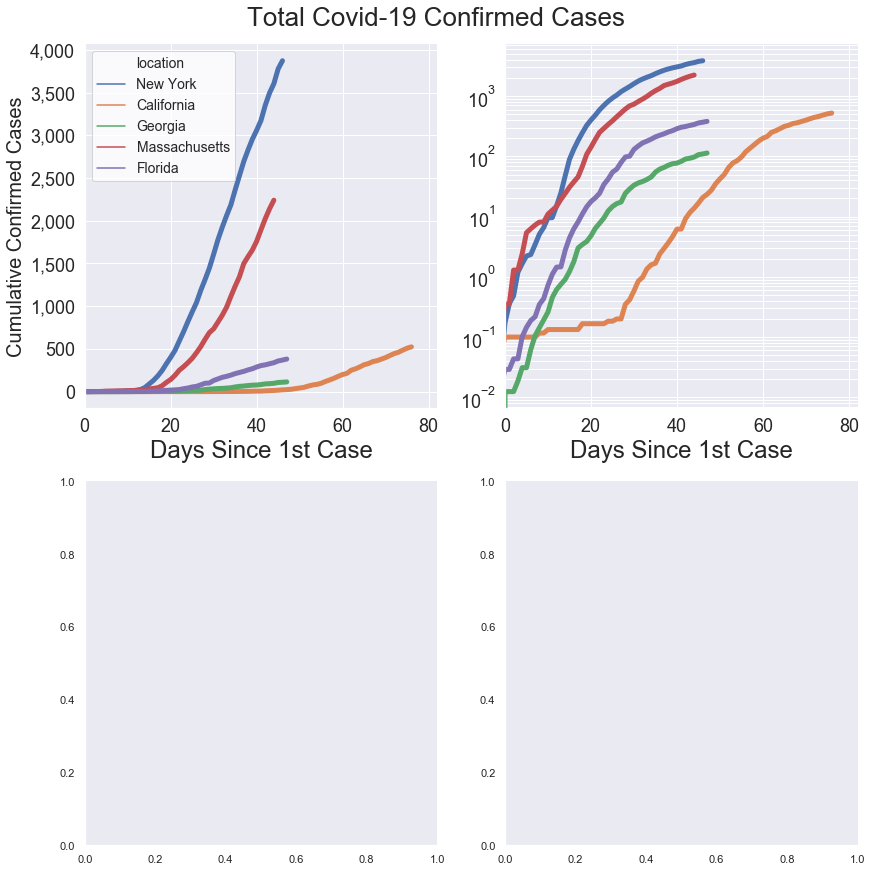

In [76]:
import matplotlib as mpl

# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

if Global:
    location_list = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
else:
    location_list = ['New York', 'California', 'Georgia', 'Massachusetts', 'Florida']
    per_capita = {'New York': 19491339, 'California': 39747267, 'Georgia': 10627767, 'Massachusetts': 6976597, 'Florida': 21992985}

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)

if Deaths:
    fig.suptitle('Total Covid-19 Deaths',fontsize=26)
else:
    fig.suptitle('Total Covid-19 Confirmed Cases',fontsize=26)

sns.set(style='ticks')
g1 = sns.lineplot(
    data=new_longdf[
        new_longdf['location'].isin(location_list)
    ], 
    x='aligned_days', 
    y='cases', 
    hue='location',
    hue_order=location_list,
    ci=None,
    legend='brief',
    linewidth=5,
    ax=ax[0][0]
    )

g2 = sns.lineplot(
    data=new_longdf[
        new_longdf['location'].isin(location_list)
    ], 
    x='aligned_days', 
    y='cases', 
    hue='location',
    hue_order=location_list,
    ci=None,
    legend=False,
    linewidth=5,
    ax=ax[0][1]
    )

# g3 = sns.lineplot(
#     data=new_longdf[
#         new_longdf['location'].isin(location_list)
#     ], 
#     x='aligned_days', 
#     y='cases',
#     hue='location',
#     hue_order=location_list,
#     ci=None,
#     legend='brief',
#     linewidth=5,
#     ax=ax[1][0]
#     )

for a in ax[0]:
    xlims = a.get_xlim()
    a.set_xlim(0, xlims[1])
    a.set_xlabel('Days Since 1st Case', fontsize=24)   
    a.tick_params(labelsize=18)
    a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    a.set_xlabel('Days Since 1st Case',fontsize=24)
    a.tick_params(labelsize=18)
    a.grid(b='True',which='both',axis='both')


sns.despine()
ax[0,0].legend(fontsize=14,loc='upper left')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('')
sns.set_style('dark')
if Deaths:
    ax[0][0].set_ylabel('Cumulative Deaths',fontsize=24)
else:
    ax[0][0].set_ylabel('Cumulative Confirmed Cases',fontsize=20)

#save figure
if Deaths:
    fig.savefig('states_covid_deaths.jpg')
else:
    fig.savefig('states_covid_cases.jpg')
    

In [8]:
#Parse population data
popdf = df.rename(columns={'Province_State':'location'}).set_index('location', drop=False)

#Set Locations to Plot

if Global:
    location_list = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
else:
    location_list = ['New York', 'California', 'Oregon', 'Massachusetts', 'Florida']
    per_capita = []
    for location in location_list:
        pop = popdf.loc[location, 'Population'].sum()
        per_capita.append(pop)
for i, idx in zip(location_list, per_capita):
    print(i+': ', idx)

New York:  23628065
California:  39512223
Oregon:  4217737
Massachusetts:  6892503
Florida:  21477737


In [252]:
new_longdf['cases_per_capita'] = new_longdf['cases']
new_longdf['cases','cases_per_capita']

KeyError: ('cases', 'cases_per_capita')

In [9]:
popdf.head()

,UID,iso2,iso3,code3,FIPS,Admin2,location,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
location,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
Guam,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,5,5,5,5,5,5,5,5,5
Northern Mariana Islands,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
Puerto Rico,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,39,42,44,45,45,51,56,58,60,62
Virgin Islands,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,2,3,3


TypeError: object of type 'NoneType' has no len()

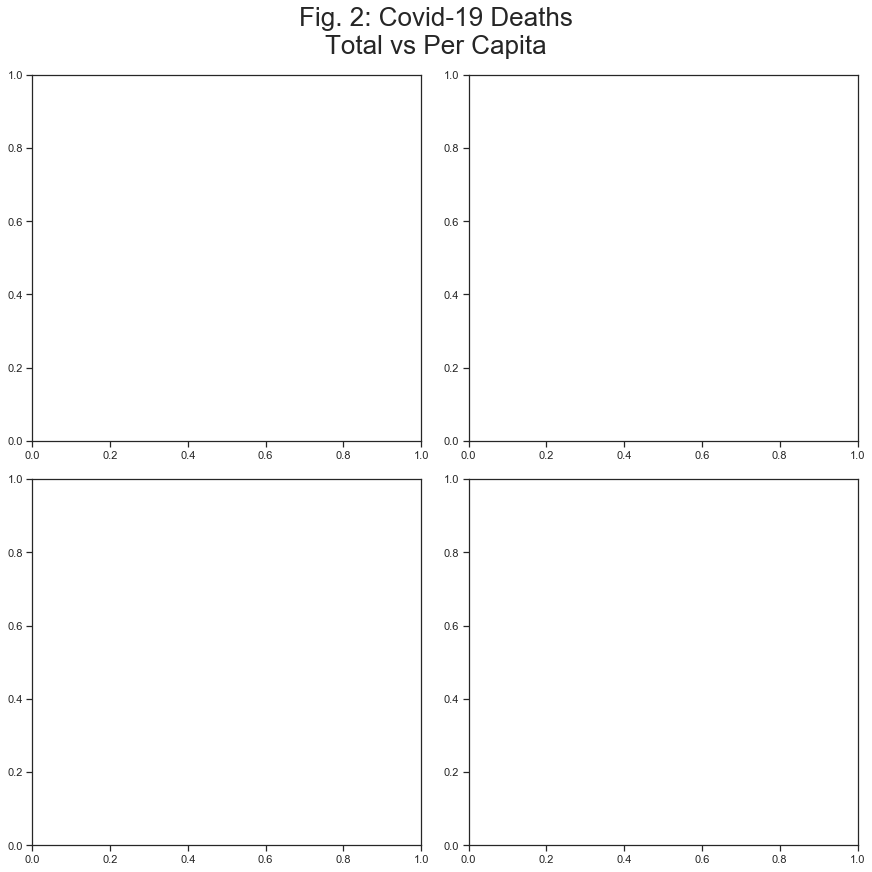

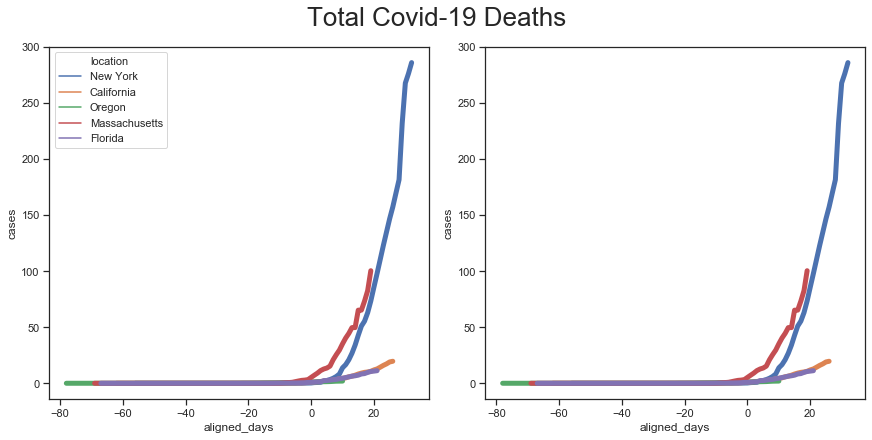

In [10]:
import matplotlib as mpl

# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)
fig.suptitle('Fig. 2: Covid-19 Deaths\nTotal vs Per Capita',fontsize=26)

fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
fig.suptitle('Total Covid-19 Deaths',fontsize=26)

sns.set(style='ticks')
g1 = sns.lineplot(
    data=new_longdf[
        new_longdf['location'].isin(location_list)
    ], 
    x='aligned_days', 
    y='cases', 
    hue='location',
    hue_order=location_list,
    ci=None,
    legend='brief',
    linewidth=5,
    ax=ax[0]
    )

g2 = sns.lineplot(
    data=new_longdf[
        new_longdf['location'].isin(location_list)
    ], 
    x='aligned_days', 
    y='cases', 
    hue='location',
    hue_order=location_list,
    ci=None,
    legend=False,
    linewidth=5,
    ax=ax[1]
    )

g3 = sns.lineplot()

for a in ax:
    xlims = a.get_xlim()
    a.set_xlim(0, xlims[1])
    a.set_xlabel('Days Since 10th Case', fontsize=24)   
    a.tick_params(labelsize=18)
    a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    a.set_xlabel('Days Since 10th Case',fontsize=24)
    a.tick_params(labelsize=18)

sns.despine()
ax[1].set_yscale('log')
if Deaths:
    ax[0].set_ylabel('Cumulative Deaths',fontsize=24)
else:
    ax[0].set_ylabel('Cumulative Confirmed Cases',fontsize=20)

# SNS in progress

# State Data Needs to Be Cleaned For Pyplot

In [11]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,4,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,39,42,44,45,45,51,56,58,60,62
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,1,1,1,1,1,2,3,3
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1,1,1,1,1,1,1,2,2,2
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,1,1,1,1,2,2,2,2,2,2
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,0,0,0,0,0,0,0,0,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,0,0,0,0,0,0,0,0


In [12]:
if Global:
    location_list = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
    for location in location_list:
        df_clean = df[df['Country/Region'] == location]
        df_clean = df_clean.set_index('Country/Region', drop = True) # set pandas dataframe index to count
        df_clean = df_clean.loc[location,'2/28/20':]
    
else:
    location_list = ['New York', 'California', 'Oregon', 'Massachusetts', 'Florida', 'South Carolina']
    for location in location_list:
        df_clean = df[df['Province_State'] == location]
        df_clean = df_clean.set_index('Province_State', drop = True) # set pandas dataframe index to countr
        df_clean = df_clean.loc[location,'2/28/20':]
    
df_clean['South Carolina']

KeyError: 'South Carolina'

/anaconda/envs/suite2p/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


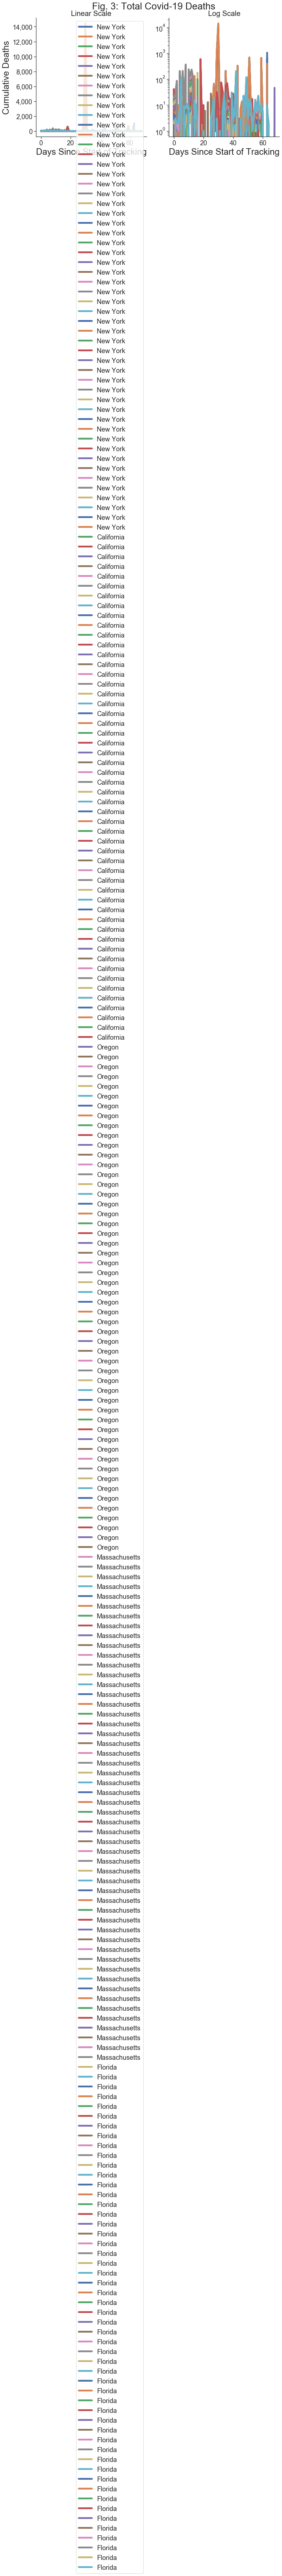

In [13]:
import matplotlib as mpl

##Cumulative Deaths - USA States

if Global:
    location_list = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
else:
    location_list = ['New York', 'California', 'Oregon', 'Massachusetts', 'Florida']

fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
fig.suptitle('Fig. 3: Total Covid-19 Deaths',fontsize=26)

for location in location_list:
    df_clean = df[df['Province_State'] == location]
    df_clean = df_clean.set_index('Province_State', drop = True) # set pandas dataframe index to location
    df_clean = df_clean.loc[location,'2/28/20':]

    for a in ax:
        a.plot(df_clean.values, label=location, linewidth=5)
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0].set_title('Linear Scale', fontsize=20)
ax[0].set_ylabel('Cumulative Deaths',fontsize=24)
ax[0].legend(fontsize=18,loc='best')
ax[1].set_title('Log Scale', fontsize=20)
ax[1].set_yscale('log')
plt.show()
    

# save your figure
#fig.savefig('total_covid_deaths.jpg')

NameError: name 'df_deaths' is not defined

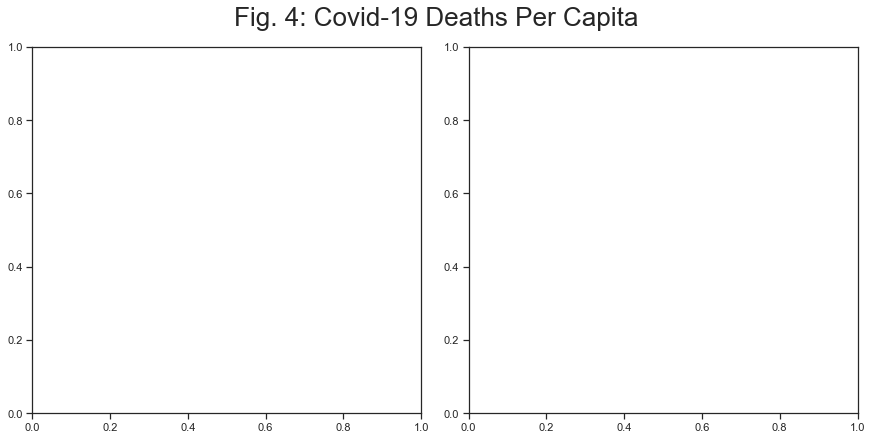

In [14]:
##Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
fig.suptitle('Fig. 4: Covid-19 Deaths Per Capita',fontsize=26)

for country,pop in zip(countries,per_capita):
    df_country = df_deaths[df_deaths['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':'4/18/20']
    data_country /= pop
    data_country *= 100
#    print(country, data_country)

    for a in ax:
        a.plot(data_country.values, label=country, linewidth=5)
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0].set_title('Linear Scale', fontsize=20)
ax[0].set_ylabel('Cumulative Deaths\n% Per Capita',fontsize=24)
ax[0].legend(fontsize=18,loc='best')
ax[1].set_title('Log Scale', fontsize=20)
ax[1].set_yscale('log')
ax[1].set_ylim()

plt.show()

# save your figure
fig.savefig('percapita_covid_deaths.jpg')

# 4-Panel Subplots Showing Deaths

NameError: name 'df_deaths' is not defined

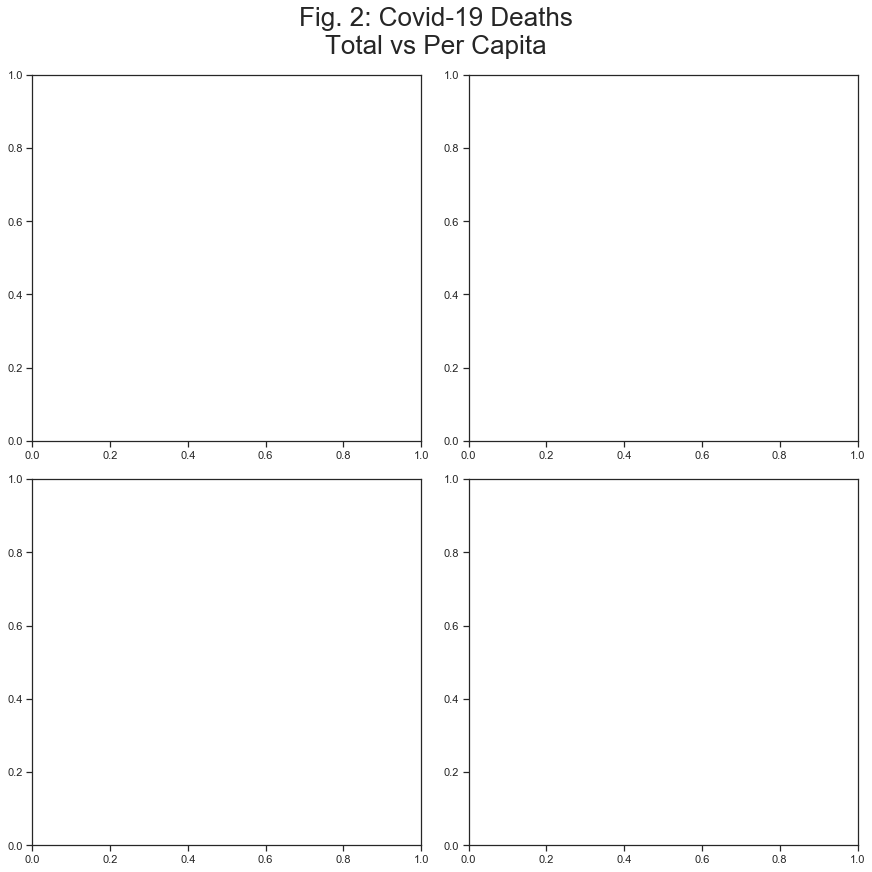

In [15]:
import matplotlib as mpl
##Cumulative and Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)
fig.suptitle('Fig. 2: Covid-19 Deaths\nTotal vs Per Capita',fontsize=26)

for country,pop in zip(countries, per_capita):
    df_country = df_deaths[df_deaths['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':'4/18/20']
#    print(data_country)

    for a in ax[0]:
        a.plot(data_country.values, label=country, linewidth=5)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.xaxis.set_ticklabels([])
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        
    for b in ax[1]:
        b.plot((data_country.values/pop)*100, label=country, linewidth=5)
        b.tick_params(labelsize=18)
        b.set_xlabel('Days Since Start of Tracking',fontsize=24)
        b.spines['right'].set_visible(False)
        b.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0,0].set_title('Linear Scale', fontsize=20)
ax[0,0].set_ylabel('Cumulative Deaths',fontsize=24)
ax[0,0].legend(fontsize=18,loc='best')
ax[0,1].set_title('Log Scale', fontsize=20)
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,0].set_ylabel('Cumulative Deaths\n% Per Capita',fontsize=24)
plt.show()

# save your figure
#fig.savefig('all_covid_deaths.jpg')

In [ ]:
df_cases = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function
df_cases

NameError: name 'df_cases' is not defined

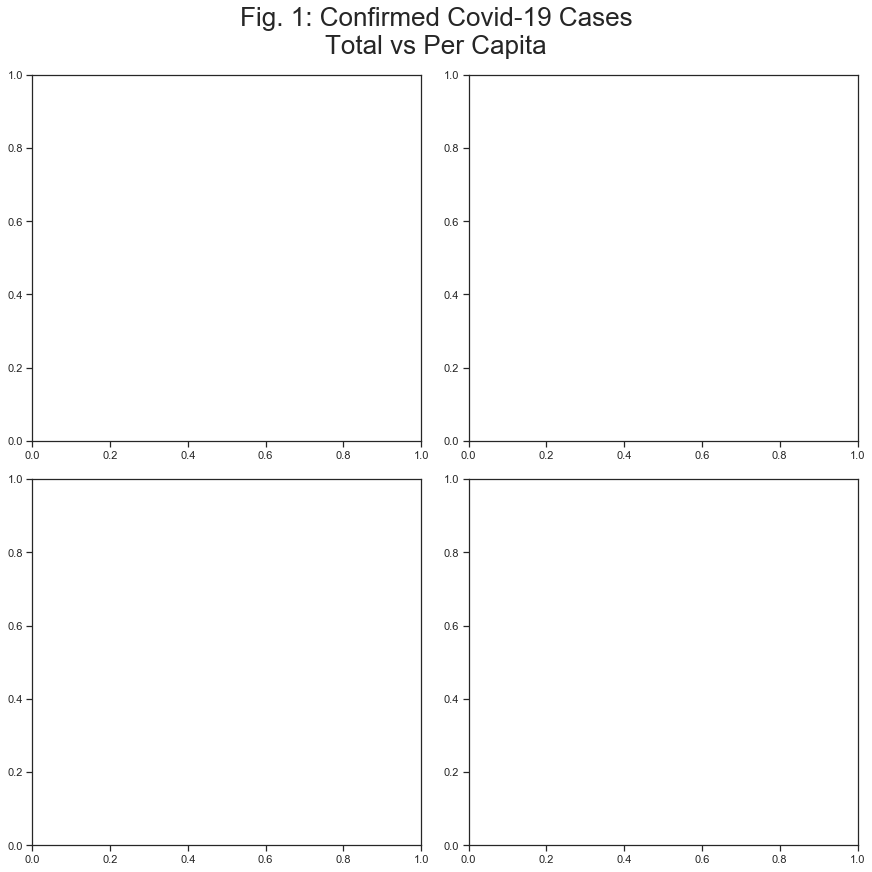

In [16]:
import matplotlib as mpl
##Cumulative and Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)
fig.suptitle('Fig. 1: Confirmed Covid-19 Cases\nTotal vs Per Capita',fontsize=26)

for country,pop in zip(countries, per_capita):
    df_country = df_cases[df_cases['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':'4/18/20']
#    print(data_country)

    for a in ax[0]:
        a.plot(data_country.values, label=country, linewidth=5)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.xaxis.set_ticklabels([])
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        
    for b in ax[1]:
        b.plot((data_country.values/pop)*100, label=country, linewidth=5)
        b.tick_params(labelsize=18)
        b.set_xlabel('Days Since Start of Tracking',fontsize=24)
        b.spines['right'].set_visible(False)
        b.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0,0].set_title('Linear Scale', fontsize=20)
ax[0,0].set_ylabel('Cumulative Confirmed Cases',fontsize=24)
ax[0,0].legend(fontsize=18,loc='best')
ax[0,1].set_title('Log Scale', fontsize=20)
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,0].set_ylabel('Cumulative Confirmed Cases\n% Per Capita',fontsize=24)
plt.show()

# save your figure
fig.savefig('all_covid_cases.jpg')